1.数据预览

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\学习\机器学习\数据分析\《Python数据分析与挖掘实战》源数据和代码\Python数据分析与挖掘实战\chapter7\demo\data\air_data.csv")

In [3]:
df.shape

(62988, 44)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


2.数据处理

数据中存在“总票价”为0，但“总飞行公里数”不为0的吊诡现象。删除这部分后剩余62044行数据，可见这部分数据量很小，所以直接删除。（“总飞行公里数”为0，且平均折扣为0的不在此列）

In [5]:
df = df[df["SUM_YR_1"].notnull() & df["SUM_YR_2"].notnull()]
index1 = df["SUM_YR_1"] != 0
index2 = df["SUM_YR_2"] != 0
index3 = (df["SEG_KM_SUM"] == 0) & (df["avg_discount"] == 0)
df = df[index1 | index2| index3]
print(df.shape)

(62044, 44)


3.理论建模



In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
df1=df[["LAST_TO_END"]]

In [8]:
df1['流失指标']=df['L1Y_Flight_Count']

In [9]:
df1

,LAST_TO_END,流失指标
0,1,107
1,7,72
2,11,70
3,97,10
4,5,81
...,...,...
62039,89,2
62040,121,2
62041,39,1
62042,464,0


In [10]:
for i in range(df1.shape[0]):
    if df['P1Y_Flight_Count'][i]>0:
        if (df["L1Y_Flight_Count"][i]- df['P1Y_Flight_Count'][i])/df["P1Y_Flight_Count"][i] >1:
            df1['流失指标'][i]=2
        else:
             df1['流失指标'][i]=(df["L1Y_Flight_Count"][i]- df['P1Y_Flight_Count'][i])/df["P1Y_Flight_Count"][i]
    else:
        df1['流失指标'][i]=3

In [11]:
df1["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])
df1["FFP_DATE"] = pd.to_datetime(df["FFP_DATE"])


In [12]:
df1["入会时间"] = df1["LOAD_TIME"] - df1["FFP_DATE"]
df1["每公里票价"] = (df["SUM_YR_1"] + df["SUM_YR_2"]) / df["SEG_KM_SUM"]
df1["季节性指标"] = df["MAX_INTERVAL"] - df["AVG_INTERVAL"]

In [13]:
df1['入会时间'] = df1['入会时间'].astype(np.int64)/(60*60*24*10**9)

In [14]:
df1["飞行次数" ]=df["FLIGHT_COUNT" ]
df1['平均折扣率']=df['avg_discount']

In [15]:
df1["总票价"] = df["SUM_YR_1"] + df["SUM_YR_2"]
df1['总加权里程']=df['WEIGHTED_SEG_KM']

In [16]:
df1.head()

,LAST_TO_END,流失指标,LOAD_TIME,FFP_DATE,入会时间,每公里票价,季节性指标,飞行次数,平均折扣率,总票价,总加权里程
0,1,0,2014-03-31,2006-11-02,2706.0,0.815798,14.516746,210,0.961639,473748.0,558440.14
1,7,0,2014-03-31,2007-02-19,2597.0,1.154043,11.805755,140,1.252314,338917.0,367777.20
2,11,0,2014-03-31,2007-02-01,2615.0,1.158217,12.701493,135,1.254676,328600.0,355966.50
3,97,0,2014-03-31,2008-08-22,2047.0,0.859648,45.136364,23,1.090870,241850.0,306900.88
4,5,0,2014-03-31,2009-04-10,1816.0,0.823617,42.211921,152,0.970658,255262.0,300834.06


In [17]:
df1.drop(["LOAD_TIME","FFP_DATE",'LAST_TO_END'],axis=1,inplace=True)

In [19]:
df1.drop(["平均折扣率"],axis=1,inplace=True)

In [21]:
df1.drop(["总票价"],axis=1,inplace=True)

In [22]:
df1.head()

,流失指标,入会时间,每公里票价,季节性指标,飞行次数,总加权里程
0,0,2706.0,0.815798,14.516746,210,558440.14
1,0,2597.0,1.154043,11.805755,140,367777.20
2,0,2615.0,1.158217,12.701493,135,355966.50
3,0,2047.0,0.859648,45.136364,23,306900.88
4,0,1816.0,0.823617,42.211921,152,300834.06


数据标准化（归一化），将有量纲数据转化为无量纲数据。

In [23]:
df1_z = (df1 - df1.mean(axis=0))/(df1.std(axis=0))
df1_z.head()

,流失指标,入会时间,每公里票价,季节性指标,飞行次数,总加权里程
0,-0.42793,1.435707,0.605115,-0.987974,14.034016,30.881220
1,-0.42793,1.307152,1.812903,-1.019566,9.073213,20.087838
2,-0.42793,1.328381,1.827807,-1.009128,8.718869,19.419237
3,-0.42793,0.658476,0.761692,-0.631155,0.781585,16.641644
4,-0.42793,0.386032,0.633034,-0.665235,9.923636,16.298203


查看是否还有无空值。

In [24]:
df1_z.isnull().sum().sort_values()

流失指标     0
入会时间     0
每公里票价    0
季节性指标    0
飞行次数     0
总加权里程    0
dtype: int64

计算簇惯性，寻找“拐点”。

In [27]:
from sklearn.cluster import KMeans

In [41]:


def distEclud(vecA, vecB):
    #计算两个向量的欧式距离的平方，并返回
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,11)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(df1_z)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(df1_z)


簇数是 2 时； SSE是 299258.6057127731
簇数是 3 时； SSE是 248174.75695311083
簇数是 4 时； SSE是 211508.28342940894
簇数是 5 时； SSE是 187635.802360967
簇数是 6 时； SSE是 168274.0982093053
簇数是 7 时； SSE是 152790.83990259064
簇数是 8 时； SSE是 142771.6643678773
簇数是 9 时； SSE是 132846.13721213915
簇数是 10 时； SSE是 126636.90660603621


数据可视化，观察SSE与K取值，尝试找出合适的K值。

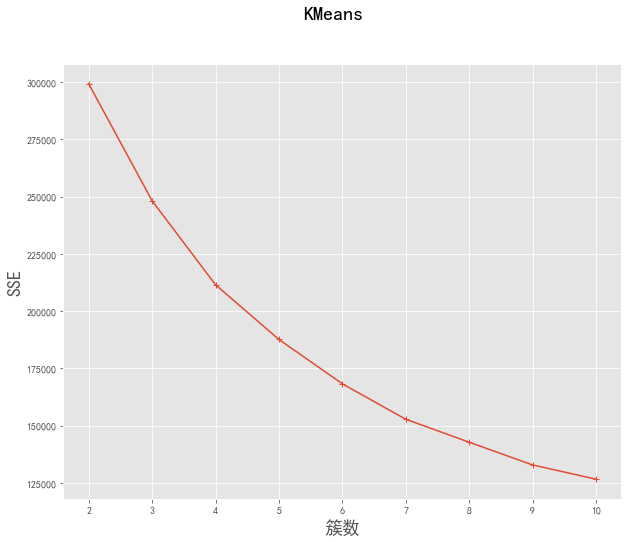

In [42]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("簇数", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()


In [37]:
from sklearn import metrics
scores = []
for k in range(2,11):
    labels = KMeans(n_clusters=k,n_jobs=4).fit(df1_z).labels_
    score = metrics.silhouette_score(df1_z, labels)
    scores.append(score)
    print(score)

scores

0.35283358311224583
0.24636717260489452
0.23284446506405668
0.24009613163035864
0.24761638526832194
0.2507052712612521
0.2453012871587106
0.22515330473863407
0.22472725351321524


[0.35283358311224583,
 0.24636717260489452,
 0.23284446506405668,
 0.24009613163035864,
 0.24761638526832194,
 0.2507052712612521,
 0.2453012871587106,
 0.22515330473863407,
 0.22472725351321524]

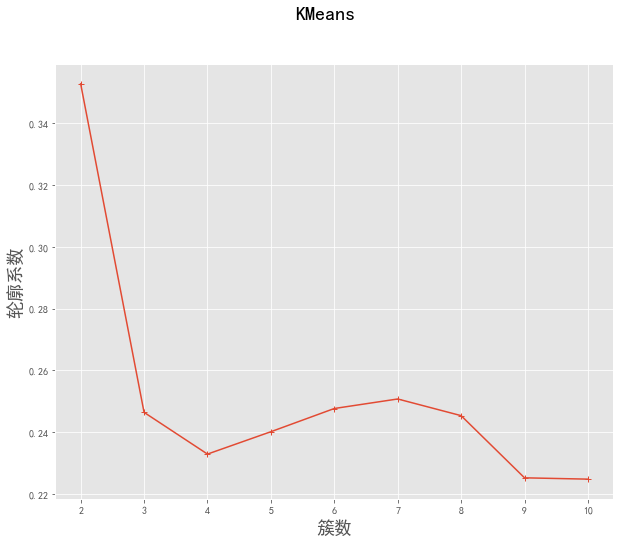

In [44]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,scores,marker="+")
ax.set_xlabel("簇数", fontsize=18)
ax.set_ylabel("轮廓系数", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

In [32]:
df1.columns

Index(['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总加权里程'], dtype='object')

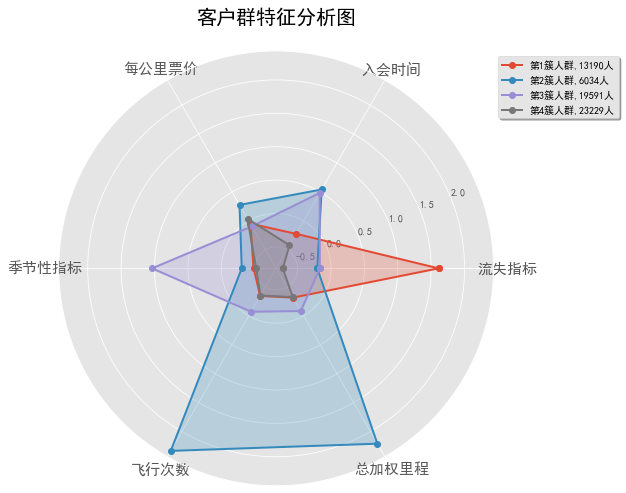

In [33]:
kmodel = KMeans(n_clusters=4, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature =['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总加权里程']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()


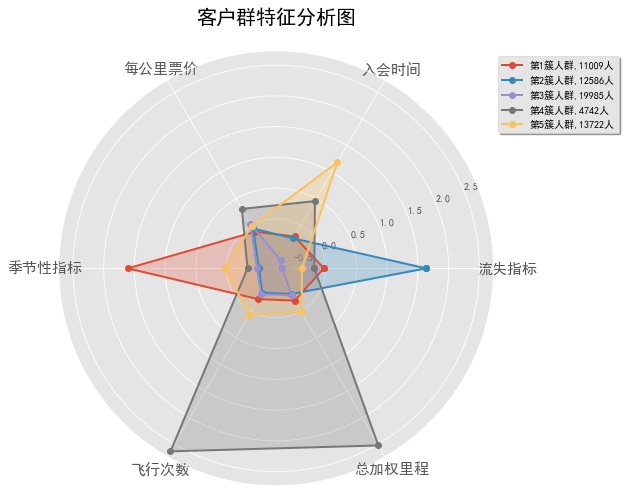

In [34]:
kmodel = KMeans(n_clusters=5, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总加权里程']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()

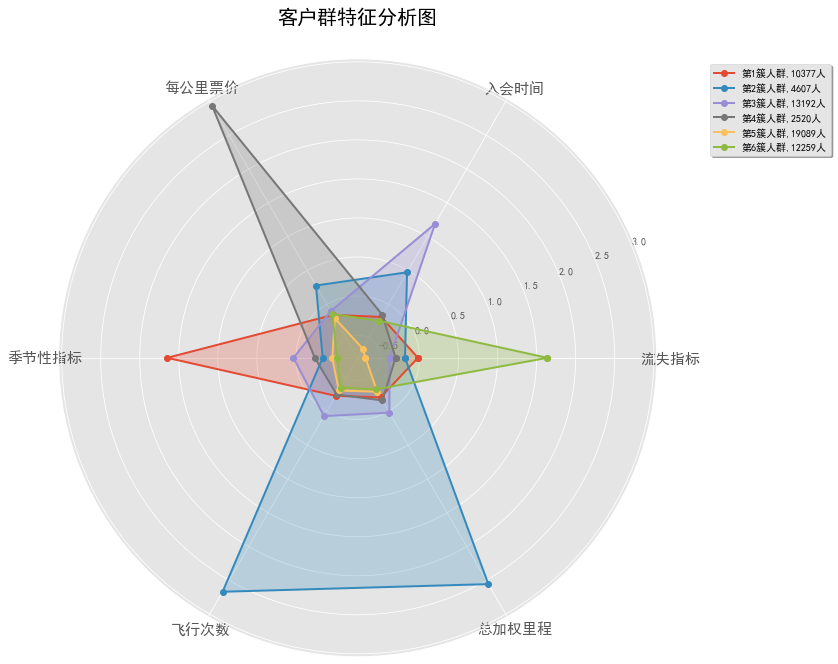

In [35]:
kmodel = KMeans(n_clusters=6, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(15, 11))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总加权里程']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()

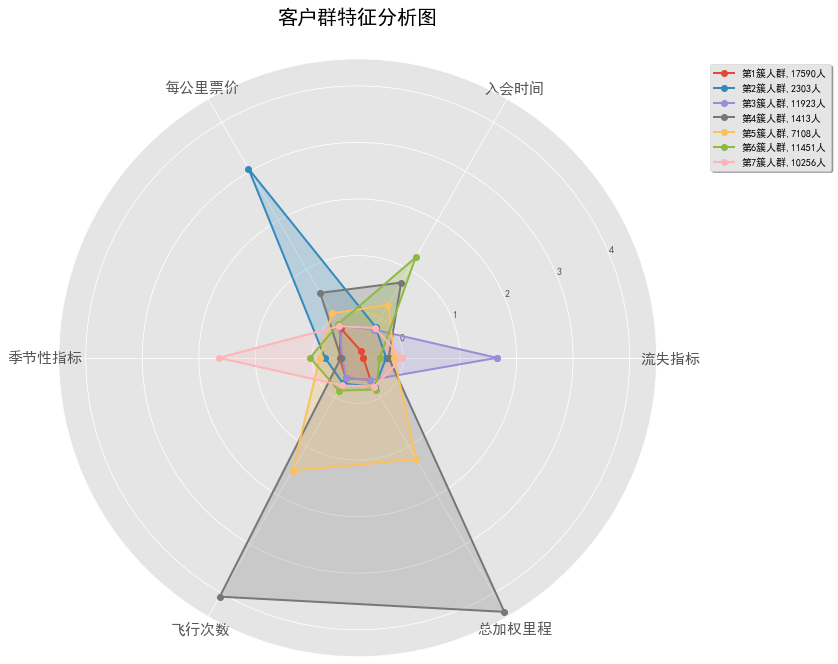

In [36]:
kmodel = KMeans(n_clusters=7, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(15, 11))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['流失指标', '入会时间', '每公里票价', '季节性指标', '飞行次数', '总加权里程']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()